In [1]:
# Functions for graphing collected data

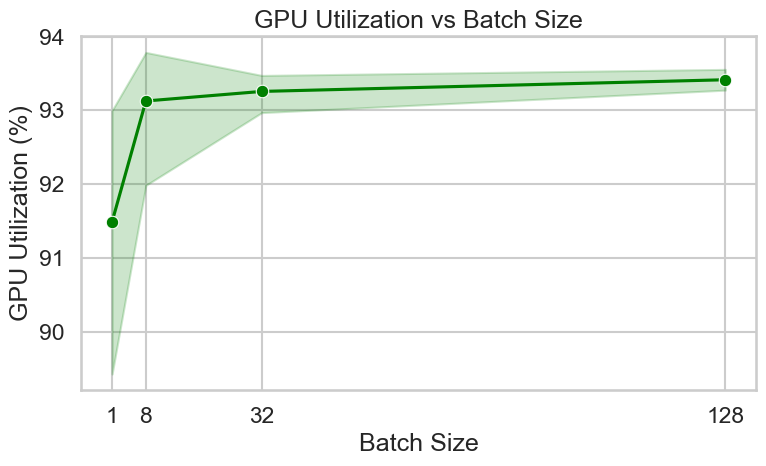

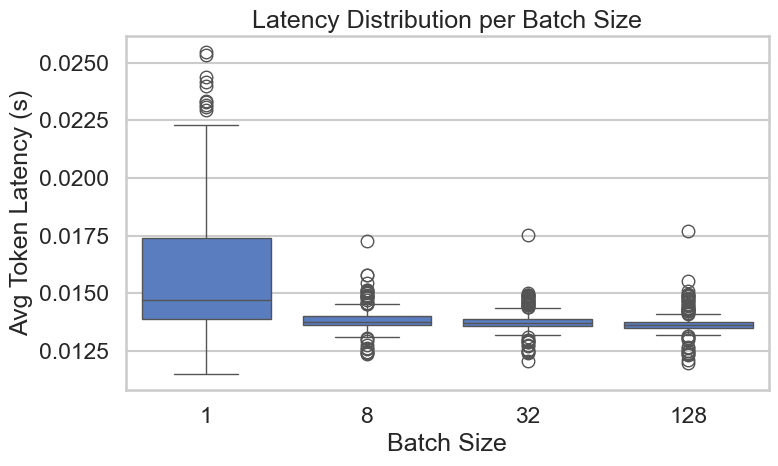

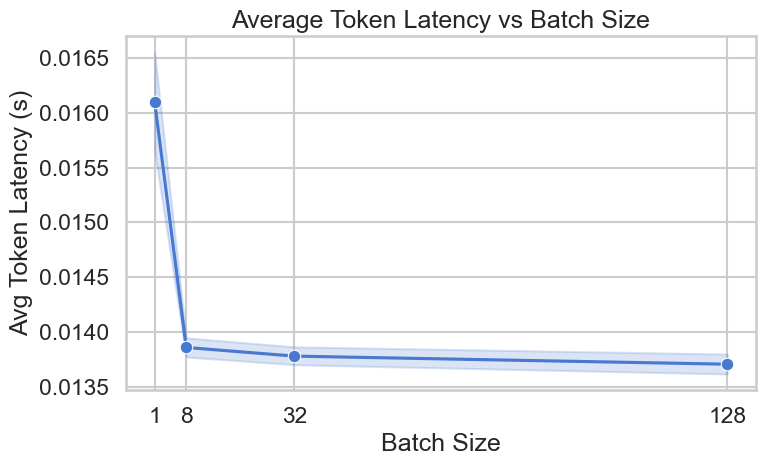

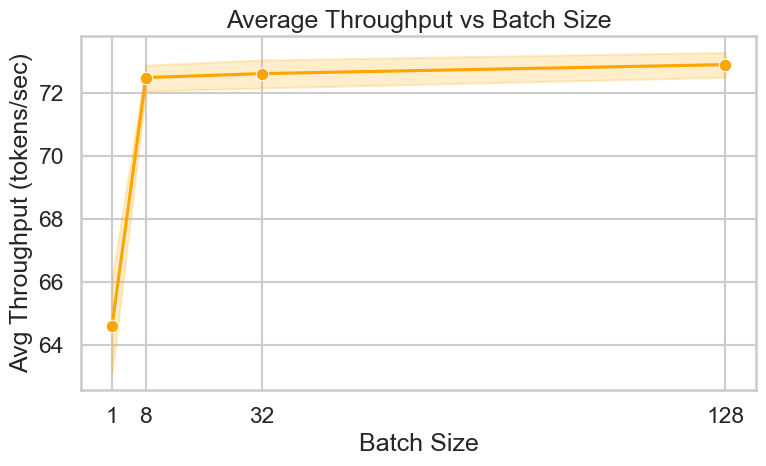

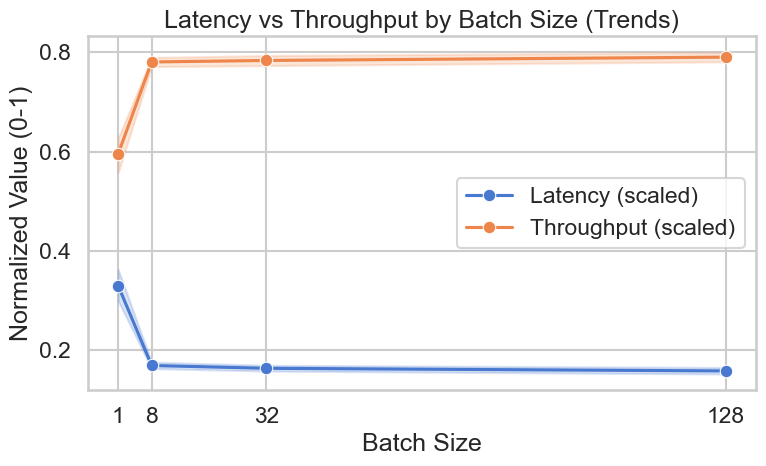

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("results/3060_final_results_cleaned.csv")
sns.set(style="whitegrid", palette="muted", context="talk")

# Define batch sizes (for ordering in plots)
batch_order = [1, 8, 32, 128]


# GPU Utilization vs Batch Size
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='batch_size', y='gpu_util_percent', marker='o', color='green', sort=False)
plt.xticks(batch_order)
plt.title("GPU Utilization vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("GPU Utilization (%)")
plt.tight_layout()
plt.show()

# Latency Distribution (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='batch_size', y='avg_token_latency', order=batch_order)
plt.title("Latency Distribution per Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Avg Token Latency (s)")
plt.tight_layout()
plt.show()

# Avg Token Latency vs Batch Size
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='batch_size', y='avg_token_latency', marker='o', sort=False)
plt.xticks(batch_order)
plt.title("Average Token Latency vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Avg Token Latency (s)")
plt.tight_layout()
plt.show()

# Avg Throughput vs Batch Size
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='batch_size', y='avg_throughput', marker='o', color='orange', sort=False)
plt.xticks(batch_order)
plt.title("Average Throughput vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Avg Throughput (tokens/sec)")
plt.tight_layout()
plt.show()

# Latency & Throughput on Same Plot (Scaled)
df_scaled = df.copy()
df_scaled['latency_scaled'] = (df['avg_token_latency'] - df['avg_token_latency'].min()) / (df['avg_token_latency'].max() - df['avg_token_latency'].min())
df_scaled['throughput_scaled'] = (df['avg_throughput'] - df['avg_throughput'].min()) / (df['avg_throughput'].max() - df['avg_throughput'].min())

plt.figure(figsize=(8,5))
sns.lineplot(data=df_scaled, x='batch_size', y='latency_scaled', marker='o', label='Latency (scaled)')
sns.lineplot(data=df_scaled, x='batch_size', y='throughput_scaled', marker='o', label='Throughput (scaled)')
plt.xticks(batch_order)
plt.title("Latency vs Throughput by Batch Size (Trends)")
plt.xlabel("Batch Size")
plt.ylabel("Normalized Value (0-1)")
plt.legend()
plt.tight_layout()
plt.show()
